In [1]:
#import useful libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#load dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe(include='all')
#by looking at the data we conclude that age has some missing data but it seems to be an important feature to determine survival chances so we need to add the missing data.
#cabin data has a lot of missing values so it will be better to simply remove it from our feature set.
#Embarked data has only very few data points missing so that can be easily worked out.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Madigan, Miss. Margaret ""Maggie""",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
#analyzing data type for features
train.info()
#name, sex, tickets, cabin(to be neglected as explained above), embarked features have string type data while rest all the features have numeric data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#handling missing data
train.isna().values.any()
#true shows there are missing data points in our data set

True

In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isna().sum()
#age, fare, cabin has missing values is test dataset

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

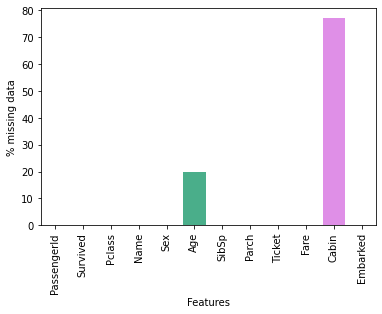

In [8]:
#visualizing missing data 
missing_data=(train.isna().sum()/len(train))*100   #percent missing data
sb.barplot(x=missing_data.index, y=missing_data)
plt.xlabel('Features')
plt.ylabel('% missing data')
plt.xticks(rotation=90)
plt.show()


In [9]:
#replacing missing data in age 
mean=train['Age'].mean()
train['Age'].fillna(mean, inplace=True)
#train['Age'].isna().values.any()    #should return False
mean_test=test['Age'].mean()
test['Age'].fillna(mean_test, inplace=True)
#test['Age'].isna().sum()     #should return 0

In [10]:
train['Cabin'].fillna('Unknown', inplace=True)
train['Embarked'].fillna('Unknown', inplace=True)
train.isna().sum()     
#no missing values anymore in train


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
test['Cabin'].fillna('Unknown', inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

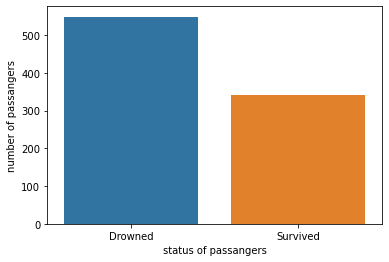

In [12]:
#analyzing and comparing the survived and drowned fractions from the train data
status=train['Survived'].value_counts()
status.index=['Drowned', 'Survived']
sb.barplot(status.index, status)
plt.xlabel('status of passangers')
plt.ylabel('number of passangers')
plt.show()


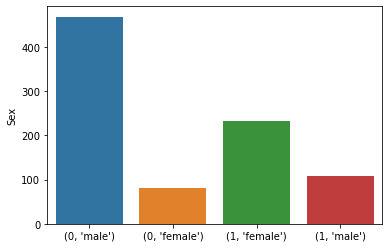

In [13]:
#analyzing which sex had higher chances of survival
#sb.barplot(x=train['Sex'], y=train['Survived'])
#plt.show()
gen=train.groupby(['Survived'])['Sex'].value_counts()
gen
#gender distribution for drowned people
sb.barplot(x=gen.index,y=gen)
plt.show()


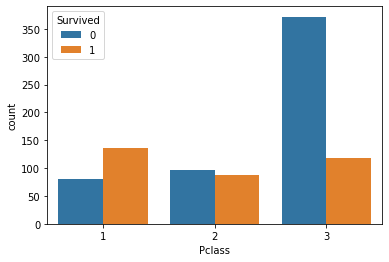

In [14]:
#which class had more surviving chances
plt.subplots()
sb.countplot('Pclass',hue='Survived', data=train)
plt.show()

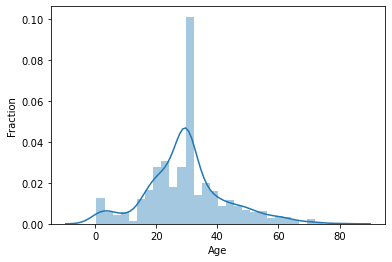

In [15]:
#analyzing survival based on age
#different age distribution
sb.distplot(train['Age'])
plt.ylabel('Fraction')
plt.show()
#we can see most of the people were between 20 amd 40 age group. 

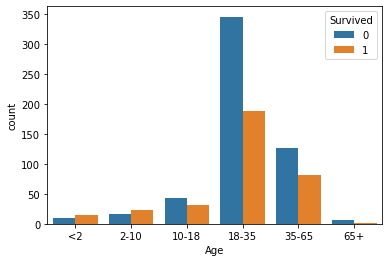

In [16]:
#age based survival chances


bins = [0, 2, 10, 18, 35, 65, np.inf]
names = ['<2','2-10', '10-18', '18-35', '35-65', '65+']


x = pd.cut(train['Age'], bins, labels=names)
sb.countplot(x, hue='Survived', data=train)
plt.show()
#maximum 18-35 age group survived and drowned

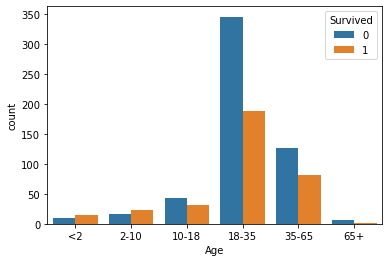

In [17]:
#analyzing families (siblings, spouses, parents, children)
family_size=train['SibSp']+train['Parch']
sb.countplot(x,hue='Survived', data=train)
plt.show()
#most of the people were travelling alone. 
#People with 1, 2 or 3 family members had more chances of survival.


In [18]:
#feature engineering


In [19]:
#dealing with categorical data
train.info()
print(train['Sex'].unique())
print(train['Embarked'].unique())
#categorical data are Sex, Ticket, Embarked


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
['male' 'female']
['S' 'C' 'Q' 'Unknown']


In [20]:
total_data=train.append(test)
total_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,Unknown,S


In [21]:
#using labelEncoder to deal with categorical data
from sklearn.preprocessing import LabelEncoder
def transform(x):
    le=LabelEncoder()
    labels=le.fit_transform(x)
    mapping={index: label for index, label in enumerate(le.classes_)}
    print(mapping)
    return labels

In [22]:
total_data['Sex']=transform(total_data['Sex'])
total_data['Embarked']=transform(total_data['Embarked'])

{0: 'female', 1: 'male'}
{0: 'C', 1: 'Q', 2: 'S', 3: 'Unknown'}


In [23]:
total_data.head()
#we see sex and embarked now have numerical values.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,2


In [24]:
#added new column family size.
total_data['Family_size']=total_data['SibSp']+total_data['Parch']+1
total_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,Unknown,2,2


In [25]:
#changing the cabin coloumn values to category of cabins
total_data['Cabin']=total_data['Cabin'].astype(str).str[0]
total_data['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [26]:
#converting cabin categories to numerical values
total_data['Cabin']=transform(total_data['Cabin'])


{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'T', 8: 'U'}


In [27]:
#dataset is preparesd with all necessary and required feature engineering
#now the task is to select which features to use in our model

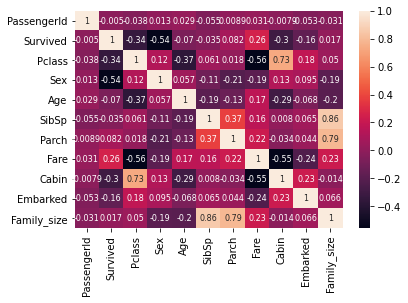

In [28]:
#correlation will show how much features are interdependent.
sb.heatmap(total_data.corr(),annot=True,annot_kws={'size':8})
plt.show()
#we see family_size, SibSp, Parch are closely interdependent which should be obvious
#Cabin and pclass are also strongly interdependent.

In [29]:
#feature seclection

features=['Pclass','Sex','Age','Fare','Cabin','Embarked', 'Family_size']

In [30]:
train=total_data[: 891]
test=total_data[891: ]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2,1


In [33]:
#total_data.isna().sum()

In [43]:
#building machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [45]:
df_train=train
df_test=test
X=df_train[features]
y=df_train['Survived'].astype(int)


In [47]:
#dividing training data into test set and training set to check accuracy of the implemented model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=324)

In [ ]:
#I will be implementing two machine learning model to make the predictions and compare which one is giving more 
#more accurate predictions
#model_1: Random forest classifier
#model_2: Logistic regression

In [50]:
#implementing random forest machine learning model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [52]:
#implementing logistic regression
logreg = LogisticRegression(max_iter=400)
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

In [53]:
#comparing accuracy
models=['Random forest','Logistic regression']
accuracy=[acc_random_forest, acc_log]
results=pd.DataFrame({'Models':models, 'Accuracy':accuracy})
results

,Models,Accuracy
0,Random forest,98.88
1,Logistic regression,80.76


In [55]:
randomForestFinalModel = RandomForestClassifier(random_state = 2, bootstrap=False,min_samples_split=2,min_samples_leaf= 5, criterion = 'entropy', max_depth = 13, max_features = 'sqrt', n_estimators = 200)
randomForestFinalModel.fit(X_train, y_train)
predictions_rf = randomForestFinalModel.predict(X_test)

In [66]:
#prediction values from random forest classifier
submission=pd.DataFrame({"PassengerId": df_test["PassengerId"],
    "Survived": randomForestFinalModel.predict( df_test[features])})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [67]:
#prediction values from logistic regression 
s=logreg.predict(df_test[features])
s=pd.DataFrame({'PassengerID':df_test['PassengerId'], 'Survived': s})
s.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [69]:
submission.to_csv('submission.csv',index=False)